# Logistic Regression

Logistic Regression is a classification algorithm.

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn import datasets

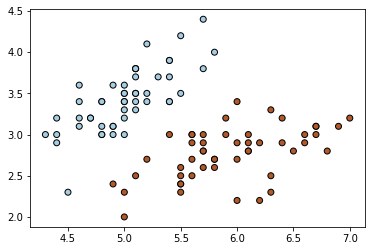

In [14]:
iris = datasets.load_iris()
X = iris.data[:, 0:2]  # we only take the first two features.
Y = iris.target

X = X[:100]
Y = Y[:100]
plt.scatter(X[:, 0], X[:, 1], c=Y, edgecolors='k', cmap=plt.cm.Paired)

In [3]:
# Create an instance of Logistic Regression Classifier and fit the data.
logreg = LogisticRegression(max_iter=10)
logreg.fit(X, Y)

/Users/zhangyihe/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(max_iter=10)

In [4]:
# Plot the decision boundary. For that, we will assign a color to each
# point in the mesh [x_min, x_max]x[y_min, y_max].
x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
h = .02  # step size in the mesh
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

In [5]:
test = np.c_[xx.ravel(), yy.ravel()]
Z = logreg.predict(test)


# Retrieve the model parameters.
b = logreg.intercept_[0]
w1, w2 = logreg.coef_.T
# Calculate the intercept and gradient of the decision boundary.
c = -b/w2
m = -w1/w2

xd = np.array([x_min, x_max])
yd = m*xd + c

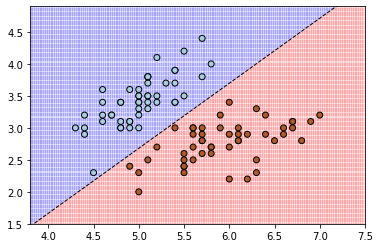

In [18]:
Z = Z.reshape(xx.shape)

fig = plt.figure()
ax = plt.axes(xlim=(x_min, x_max), ylim=(y_min, y_max))
plt.pcolormesh(xx, yy, Z, shading='auto', cmap = "bwr", alpha = 0.1)
plt.scatter(X[:, 0], X[:, 1], c=Y, edgecolors='k', cmap=plt.cm.Paired)
plt.plot(xd, yd, 'k', lw=1, ls='--')
# fig.savefig("LR.pdf", bbox_inches='tight')


In [7]:
# def lr_with_step(step, X, y, test_X, test_y):
#     logreg = LogisticRegression(max_iter=step)
#     logreg.fit(X, Y)

In [12]:
# from matplotlib import animation

# # First set up the figure, the axis, and the plot element we want to animate
# fig = plt.figure()
# ax = plt.axes(xlim=(0, 2), ylim=(-2, 2))
# line, = ax.plot([], [], lw=2)

# # initialization function: plot the background of each frame
# def init():
#     line.set_data([], [])
#     return line,

# # animation function.  This is called sequentially
# def animate(i):
#     x = np.linspace(0, 2, 1000)
#     y = np.sin(2 * np.pi * (x - 0.01 * i))
#     line.set_data(x, y)
#     return line,

# # call the animator.  blit=True means only re-draw the parts that have changed.
# anim = animation.FuncAnimation(fig, animate, init_func=init,
#                                frames=200, interval=20, blit=True)


# from IPython.display import HTML
# HTML(anim.to_html5_video())